#TD4: Data Preprocessing with Spark

In [2]:
!pip install --upgrade pyspark==3.5.4 py4j

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 14.0 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.5.4-py2.py3-none-any.whl size=317849766 sha256=3c6d6c0ca7d48ff28c0774716252cfdf93710e5456cbcac97334323e5e80eff2
  Stored in directory: /root/.cache/pip/wheels/8d/28/22/5dbae8a8714ef046cebd320d0ef7c92f5383903cf854c15c0c
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9
    Uninstalling py4j-0.10.9:
      Successfully uninstalled py4j-0.10.9
  Attempting uninstall: pyspark
    Found existing installation: pyspark 3.0.3
    Uninstalling pyspark-3.0.3:
      Successfully uninstalled pyspark-3.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyspark-stubs 3.0.0.post

In [2]:
import pyspark
import numpy as nop
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
spark = SparkSession.builder \
    .master("local") \
    .appName("TD3") \
    .getOrCreate()

In [3]:
sc = spark.sparkContext

## Exploring the MovieLens 100k dataset


### 1) Download then unzip the MovieLens dataset available

In [4]:
#Q1
# Download the folder on moodle and unzip it or download it from here (faster if you use colab)
!wget -q http://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip ml-100k.zip

Archive:  ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base         
  inflating: ml-100k/u2.test         
  inflating: ml-100k/u3.base         
  inflating: ml-100k/u3.test         
  inflating: ml-100k/u4.base         
  inflating: ml-100k/u4.test         
  inflating: ml-100k/u5.base         
  inflating: ml-100k/u5.test         
  inflating: ml-100k/ua.base         
  inflating: ml-100k/ua.test         
  inflating: ml-100k/ub.base         
  inflating: ml-100k/ub.test         


### 2a) Check out the README file which contains a detailed description of the dataset, use '!head'.

In [ ]:
#Q2a
!head /content/ml-100k/README

SUMMARY & USAGE LICENSE

MovieLens data sets were collected by the GroupLens Research Project
at the University of Minnesota.
 
This data set consists of:
	* 100,000 ratings (1-5) from 943 users on 1682 movies. 
	* Each user has rated at least 20 movies. 
        * Simple demographic info for the users (age, gender, occupation, zip)


### 2b) Check the format of the file, to understand the best way to open it, use !file command followed by the path to the file

In [ ]:
#Q2b

In [7]:
!file /content/ml-100k/u.user


/content/ml-100k/u.user: ASCII text


In [8]:
!file /content/ml-100k/u.item


/content/ml-100k/u.item: ASCII text


In [9]:
!file /content/ml-100k/u.data


/content/ml-100k/u.data: ASCII text


### 2c)Now that you know the best way to treat this file, print the first 5 lines of the u.user, u.item, u.data files. Use .take() function




In [10]:
user = sc.textFile("/content/ml-100k/u.user")
user.take(5)

['1|24|M|technician|85711',
 '2|53|F|other|94043',
 '3|23|M|writer|32067',
 '4|24|M|technician|43537',
 '5|33|F|other|15213']

In [16]:
item = sc.textFile("ml-100k/u.item")
item.take(5)


['1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0',
 '2|GoldenEye (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?GoldenEye%20(1995)|0|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0',
 '3|Four Rooms (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0',
 '4|Get Shorty (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995)|0|1|0|0|0|1|0|0|1|0|0|0|0|0|0|0|0|0|0',
 '5|Copycat (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Copycat%20(1995)|0|0|0|0|0|0|1|0|1|0|0|0|0|0|0|0|1|0|0']

In [12]:
data = sc.textFile('/content/ml-100k/u.data')
data.take(5)

['196\t242\t3\t881250949',
 '186\t302\t3\t891717742',
 '22\t377\t1\t878887116',
 '244\t51\t2\t880606923',
 '166\t346\t1\t886397596']

 ## Exploring the user dataset


### 3) Print the first line of the u.user data using .first() function. Do you notice something in the structure of the u.user data?

In [15]:
#Q3
user.first()

'1|24|M|technician|85711'

Data is separated with the cahracter "|"

### 4) Count the number of unique: users, genders, occupations, and ZIP codes

*   Take in to account what you noticed in the point 3, divide the data properly (using split())
*   Take a look to the README to understand the organization of the data
*   Take in to account what you noticed in point 2, take a look to the functions distinct()


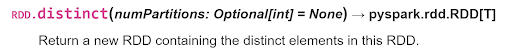



In [18]:
#Q4
user_fields = user.map(lambda line: line.split("|")) #each row in mapped(using split) to a list, check out user_fields using
num_users = user_fields.map(lambda fields: fields[0]).count() #each row is mapped to its first element (user id), then returns the number of row
num_genders = user_fields.map(lambda fields:fields[2]).distinct().count() #each row is mapped to its second element (gender), removes repeated values, then returns the number of row
num_occupations = user_fields.map(lambda fields:fields[3]).distinct().count()
num_zipcodes = user_fields.map(lambda fields:fields[4]).distinct().count()
print("Users: ",num_users ,", genders: ",num_genders , ", occupations: ", num_occupations, ", ZIP codes: ", num_zipcodes)

Users:  943 , genders:  2 , occupations:  21 , ZIP codes:  795


In [19]:
user_fields.take(5)

[['1', '24', 'M', 'technician', '85711'],
 ['2', '53', 'F', 'other', '94043'],
 ['3', '23', 'M', 'writer', '32067'],
 ['4', '24', 'M', 'technician', '43537'],
 ['5', '33', 'F', 'other', '15213']]

### 5) Create a histogram to analyze the distribution of user ages

Using matplotlib's hist()  

Be sure that age is a number mapping the values into integers.


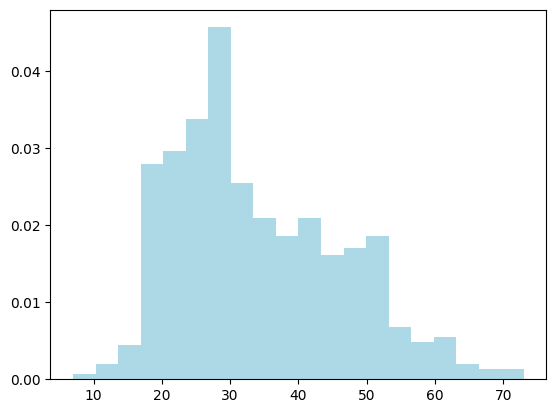

In [20]:
#Q5
ages = user_fields.map(lambda fields: int(fields[1])).collect()
plt.hist(ages, bins=20, color='lightblue', density=True)
# We passed in the ages array, together with the number of bins for our histogram
# ( 20 in this case), to the hist function. Using the normed=True argument, we also
# specified that we want the histogram to be normalized so that each bucket represents
# the percentage of the overall data that falls into that bucket.
fig = plt.gcf() #eliminate the values
#notice that the skewed towards younger users

### 6) Create a histogram to analyze the (sorted) frequencies of the various occupations

Take a look at the function  reduceByKey()

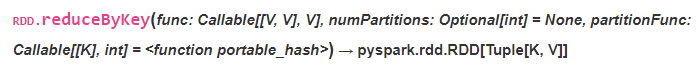

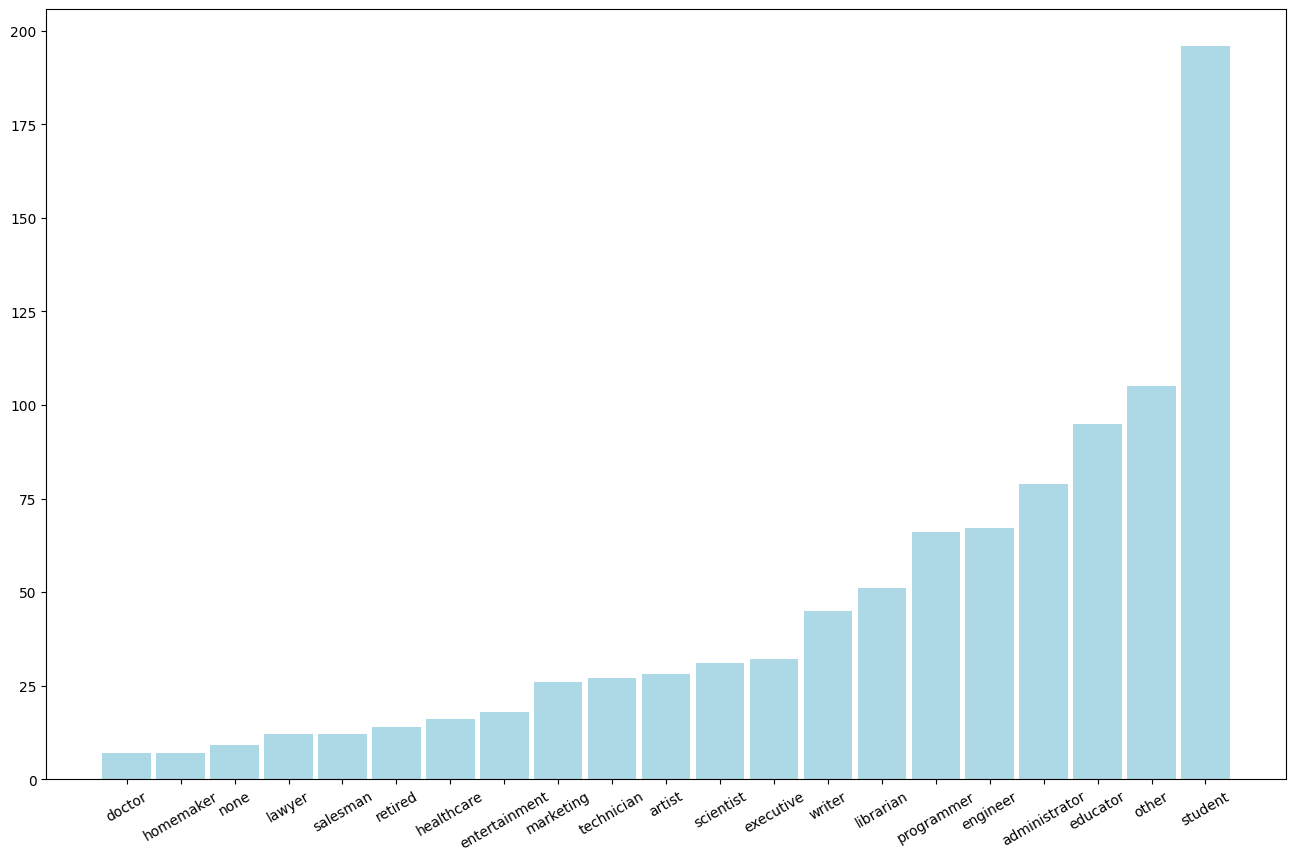

In [25]:
#Q6
#reduceByKey aggregates elements by key. The aggregation function is given as lambda function
count_by_occupation = user_fields.map(lambda fields: (fields[3], 1)).reduceByKey(lambda x, y: x + y).collect()
#sort count_by_occupation into 2 different array using numpy
x_axis1 = np.array([c[0] for c in count_by_occupation]) #occupation
y_axis1 = np.array([c[1] for c in count_by_occupation]) #occurences

#an alternative solution would be
# count_by_occupation = user_fields.map(lambda fields: fields[3]).countByValue()
# x_axis1 = np.array([c for c in count_by_occupation.keys()])
# y_axis1 = np.array([c for c in count_by_occupation.values()])

x_axis = x_axis1[np.argsort(y_axis1)] # argsort return the indexes of resorting y_axis1, check out print(np.argsort(y_axis1))
y_axis = y_axis1[np.argsort(y_axis1)] # argsort return the indexes of resorting y_axis1, check out print(np.argsort(y_axis1))
#some visual ararngement
pos = np.arange(len(x_axis))
width = 0.9
ax = plt.axes()
ax.set_xticks(pos)
ax.set_xticklabels(x_axis)
plt.bar(pos, y_axis, width, color='lightblue')
plt.xticks(rotation=30)
fig = plt.gcf()
fig.set_size_inches(16, 10)

##Exploring the movie dataset

### 7) Import the u.item data file into an RDD, print the first line of the RDD, then count the number of movies


In [26]:
#Q7
print(item.first())
num_movies = item.count()
print("Movies: ", num_movies)

1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0
Movies:  1682


### 8) Plot the distribution of movie release year.
You can filter out or fill in bad/missing data (check that the year format is composed of 4 digits.


<class 'pyspark.rdd.PipelinedRDD'>


<BarContainer object of 71 artists>

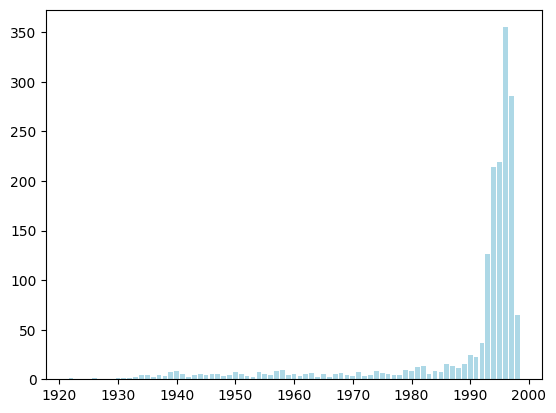

In [27]:
#Q8
movie_fields = item.map(lambda lines: lines.split("|"))
#extract the release date (3rd field), exact that last 4 characters, then filter out bad year format
years = movie_fields.map(lambda fields: fields[2]).map(lambda x:x[-4:])
years_filtered = years.filter(lambda y:len(y)==4).map(lambda y:int(y))
print(type(years_filtered)) #<class 'pyspark.rdd.PipelinedRDD'>
# #bin in each release year
occ_release_year = years_filtered.countByValue()
plt.bar(list(occ_release_year.keys()), occ_release_year.values(), color='lightblue')


##Exploring the rating dataset

### 9) Import the u.data data file into an RDD, print the first line of the RDD, then count the number of ratings


In [28]:
#Q9
print(data.first())
num_ratings = data.count()
print("Ratings: ", num_ratings)

196	242	3	881250949
Ratings:  100000


### 10) Print the minimum, max, average(mean), median ratings, then the average number of ratings per user then per movie
Use numpy functions.

In [29]:
#Q10
rating_data = data.map(lambda line:line.split("\t"))
ratings = rating_data.map(lambda fields:int(fields[2]))
print("Min rating", ratings.min())
print("Max rating", ratings.max())
print("Mean rating", ratings.mean())
print("Median rating", np.median(ratings.collect()))
#print(ratings.stats())
print('Average number of ratings per user',num_ratings / num_users)
print('Average number of ratings per movie',num_ratings / num_movies)

Min rating 1
Max rating 5
Mean rating 3.529859999999947
Median rating 4.0
Average number of ratings per user 106.04453870625663
Average number of ratings per movie 59.45303210463734


### 11) Plot the frequency of rating values
Use countByValue function

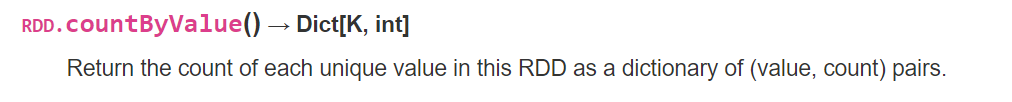

<BarContainer object of 5 artists>

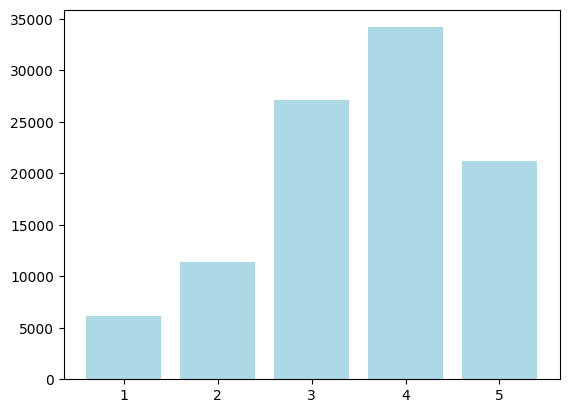

In [30]:
#Q11
freq_ratings = ratings.countByValue()
plt.bar(list(freq_ratings.keys()),list(freq_ratings.values()), color='lightblue')
# notice that the distribution of ratings is skewed towards average to high ratings

### 12) Plot the histogram of number of ratings per user

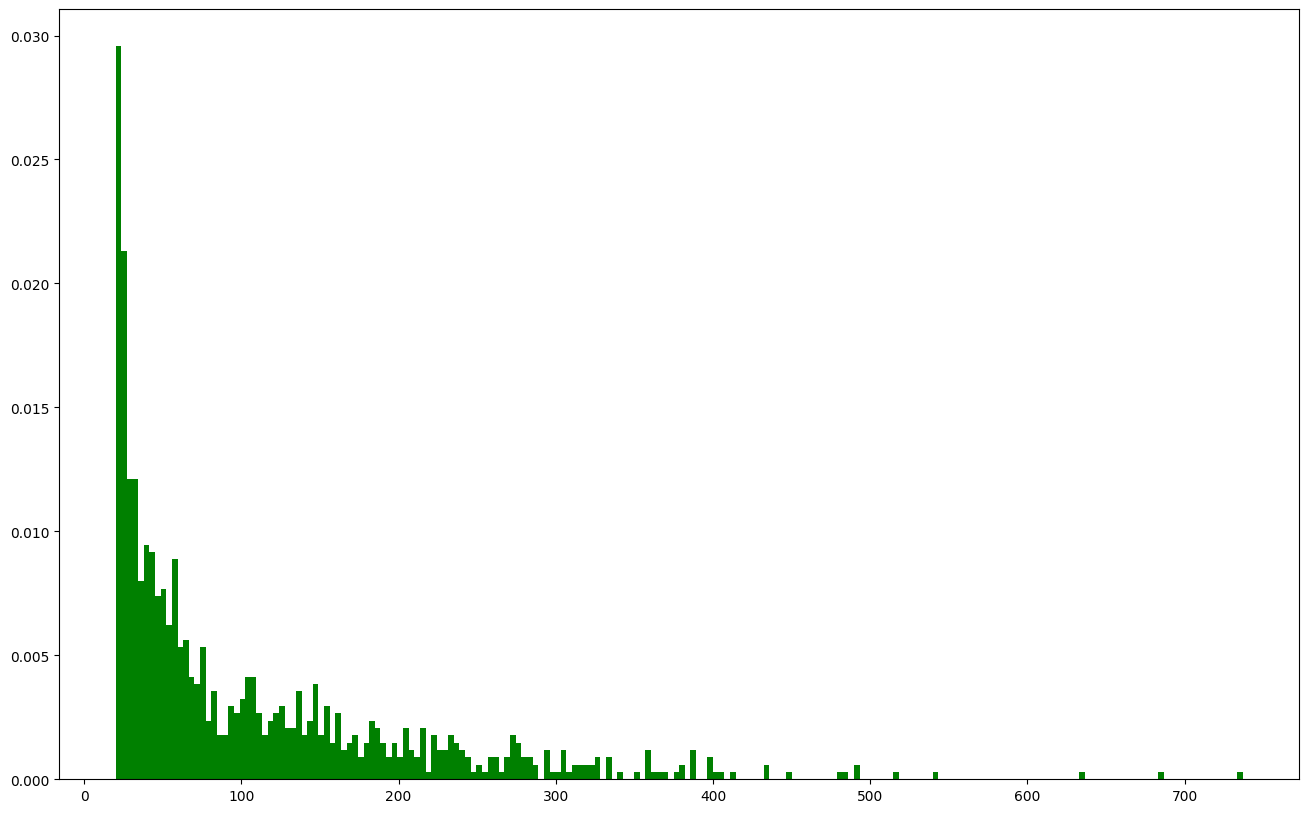

In [32]:
#Q12
#we can use groupByKey to aggregate each user rating is an iterable (set),
user_ratings_grouped = rating_data.map(lambda fields:(int(fields[0]),int(fields[2]))).groupByKey()
#check out list(user_ratings_grouped.first()[1])
user_ratings_grouped_nb = user_ratings_grouped.map(lambda item:(item[0],len(item[1])))
nb_ratings_per_user = user_ratings_grouped_nb.map(lambda item:item[1]).collect()
plt.hist(nb_ratings_per_user, bins=200, color='g', density=True)
fig = plt.gcf()
fig.set_size_inches(16,10)

##Extracting features from data

Features refer to the variables that are fed to train our Machine learning/Deep learning models. Since the majority of ML algorithms uses numerical representation in the form of vector. Hence :
Categorical variables are often transformed to numerical ones using the one-hot encoding. Note that with DataFrame, you can use StringIndexer, OneHotEncoderEstimator, and VectorAssembler.
Text is often transformed to useful features using Natural Language Processing (NLP) techniques. It is quite common to follow these steps: tokenization, stop word removal, stemming, then vectorization.

Nowdays, in Large Language Models (LLMs) like GPT, BERT, and LLaMA, many of these preprocessing steps are automatically handled by the tokenization process, eliminating the need for 'manual steps'.




### 13) Transform the categorical variable “occupation” into a numerical  binary feature vector one hot-encoded


First select the job data inside the user_fields. Then, transform each job into a numerical value [0,1,2,3,4 etc.], in a second moment transform those values into binary values. For example, if we have only four jobs in our list, the list would be [0,1,2,3] and thus job 0 would be described in binary values in one hot encoding as [1,0,0,0]. Similarly, job 1 would be described by [0,1,0,0].

Use the function distinct() and collect().
Save each occupation as a value in a dict


In [ ]:
#Q13
all_occupations = user_fields.map(lambda fields: fields[3]).distinct().collect()
all_occupations.sort()
idx = 0
all_occupations_dict = {}
for o in all_occupations:
  all_occupations_dict[o] = idx
  idx +=1
# try a few examples to see what "1-of-k" encoding is assigned
print("Encoding of 'doctor': ", all_occupations_dict['doctor'])
print("Encoding of 'programmer': ", all_occupations_dict['programmer'])
print(all_occupations_dict)

Encoding of 'doctor':  2
Encoding of 'programmer':  14
{'administrator': 0, 'artist': 1, 'doctor': 2, 'educator': 3, 'engineer': 4, 'entertainment': 5, 'executive': 6, 'healthcare': 7, 'homemaker': 8, 'lawyer': 9, 'librarian': 10, 'marketing': 11, 'none': 12, 'other': 13, 'programmer': 14, 'retired': 15, 'salesman': 16, 'scientist': 17, 'student': 18, 'technician': 19, 'writer': 20}


In [ ]:
def one_hot_encode_job(job):
    num_jobs = len(all_occupations_dict)
    encoding = [0] * num_jobs
    if job in all_occupations_dict:
        encoding[all_occupations_dict[job]] = 1
    return encoding

for job in all_occupations_dict:
    encoding = one_hot_encode_job(job)
    print(f"{job}: {encoding}")


administrator: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
artist: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
doctor: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
educator: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
engineer: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
entertainment: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
executive: [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
healthcare: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
homemaker: [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
lawyer: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
librarian: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
marketing: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
none: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
other: [0, 0, 0, 0, 0, 0, 0, 0, 

### 14) Create an RDD representing the period of the day when each rating has been done

Extract the hour of the day from the time stamp


*   Take data from point 10
*   Transform each time in a 'human format', take a look to datatime.datatime.fromtimestamp() (Remember that datetime has fields hour and minute. So to get the hours and minutes, you will use .hour and .minute)

Map the hour to day time according to the following: morning= [7-12[, lunch=[12-14[, afternoon=[14-18[, evening=[18, 23[, night=[23,7[

In [ ]:
#Q14
import datetime
timestamps = rating_data.map(lambda fields: int(fields[3]))
timestamps.take(5)

[881250949, 891717742, 878887116, 880606923, 886397596]

In [ ]:
hour_of_day = timestamps.map(lambda ts: datetime.datetime.fromtimestamp(ts).hour)
hour_of_day.take(5)

[15, 19, 7, 5, 5]

In [ ]:
def assign_tod(hr):
    times_of_day = {
      'morning' : range(7, 12),
      'lunch' : range(12, 14),
      'afternoon' : range(14, 18),
      'evening' : range(18, 23),
      'night' : range(23, 7)
    }
    for k, v in times_of_day.items():
      if hr in v:
        return k

time_of_day = hour_of_day.map(lambda hr: assign_tod(hr))
time_of_day.take(5)

['afternoon', 'evening', 'morning', None, None]